In [1]:
import numpy as np
import pandas as pd
import math

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
## data info:
#This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
#X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
#X2: Gender (1 = male; 2 = female). 
#X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
#X4: Marital status (1 = married; 2 = single; 3 = others). 
#X5: Age (year). 
#X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
#X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
#X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

data = pd.read_csv('credit_card_default.csv') 

In [3]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


There's no missing data, but everything is set as ints. This doesnt seem right

In [5]:
data.nunique()

LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_1           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
default          2
dtype: int64



From the data above, we can see that there are multiple categorical variables. Sex, education, marriage. pay_0 - pay_6 is the number of month after the current one that the person paid, so it can be a categorical or a numerical. I think it would be better as a numerical data. sex and default have only 2 options so there's no need to make categorical variable. But we should build some dummy variables for education and marriage.



In [6]:
data = pd.get_dummies(data, columns = ['EDUCATION', 'MARRIAGE'], drop_first = True)

In [7]:
data.head()

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,default,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,2,24,2,2,-1,-1,-2,-2,3913,...,1,0,1,0,0,0,0,1,0,0
1,120000,2,26,-1,2,0,0,0,2,2682,...,1,0,1,0,0,0,0,0,1,0
2,90000,2,34,0,0,0,0,0,0,29239,...,0,0,1,0,0,0,0,0,1,0
3,50000,2,37,0,0,0,0,0,0,46990,...,0,0,1,0,0,0,0,1,0,0
4,50000,1,57,-1,0,-1,0,0,0,8617,...,0,0,1,0,0,0,0,1,0,0


In [8]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data)

In this training data, we see that 17515 out of 22500 people did not default on their loans. As we expect, most people do their best to not default on their payments. This however, creates a imbalance of data that we need to deal with


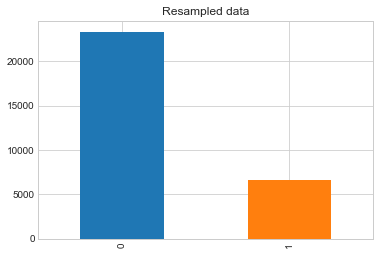

In [10]:
countNoDefault, _ = train.default.value_counts()
countData = len(train)
print(f'In this training data, we see that {countNoDefault} out of {countData} people did not default on their loans. As we expect, most people do their best to not default on their payments. This however, creates a imbalance of data that we need to deal with')
data.default.value_counts().plot(kind = 'bar', title = 'Resampled data')

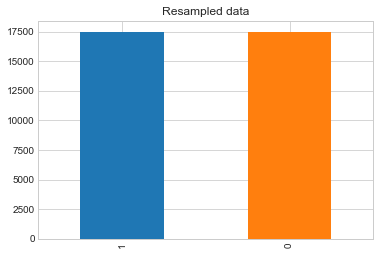

In [11]:
type(train)
default = train.loc[train.default ==1]
noDefault = train.loc[train.default == 0]
defaultOver = default.sample(countNoDefault, replace = True)
train = pd.concat([defaultOver, noDefault], axis = 0)
train.default.value_counts().plot(kind='bar', title='Resampled data');

In [12]:
x_train = train.loc[:, train.columns !='default']
y_train = np.ravel(train.loc[:,train.columns =='default'])
x_test = test.loc[:, test.columns !='default']
y_test = np.ravel(test.loc[:,test.columns =='default'])

In [13]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler();
scaled_train  = pd.DataFrame(scale.fit_transform(x_train),columns = x_train.columns)
scaled_test  = pd.DataFrame(scale.fit_transform(x_test),columns = x_test.columns)



In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [15]:
def tune (model, params, kfold):
    grid = GridSearchCV(model, params, verbose = 2, cv = kfold, scoring = 'roc_auc', n_jobs = -1)
    grid.fit(scaled_train, y_train)
    best_params = grid.best_params_
    return best_params

In [16]:
def perf (model):
    model.fit(scaled_train, y_train)
    y_train_pred = model.predict(scaled_train)
    y_test_pred = model.predict(scaled_test)
    roc_auc_train = round(roc_auc_score(y_train, y_train_pred),3)
    roc_auc_test = round(roc_auc_score(y_test, y_test_pred),3)
    return roc_auc_train, roc_auc_test

In [17]:
def graph(title, xlabel, ylabel, results):
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(results[0], results[1], label='Training Data');
    ax.plot(results[0], results[2], label = 'Test Data');
    plt.legend();
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 11.0min finished


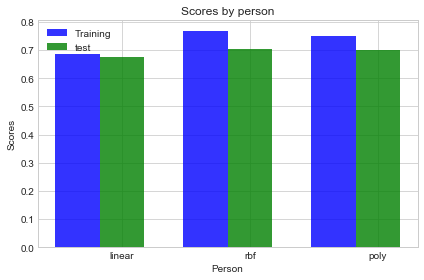

In [18]:
from sklearn.svm import SVC

SVM_params = {'C': [2**-5, 2**-3, 2**-1, 2**3], 
              'kernel': ['linear','rbf', 'poly']}

SVM = SVC()
SVM_para= tune(SVM, SVM_params,3)
SVM_test = SVM_para.copy()
del SVM_test['kernel']
training_plot = []
test_plot =[]
ticks = ['linear','rbf', 'poly']
for i in ticks:
    SVM_with_best_para = SVC(**SVM_test, kernel = i)
    roc_auc_train, roc_auc_test = perf(SVM_with_best_para)
    training_plot.append(roc_auc_train)
    test_plot.append(roc_auc_test)

# create plot
fig, ax = plt.subplots()
index = np.arange(3)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, training_plot, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Training')
 
rects2 = plt.bar(index + bar_width, test_plot, bar_width,
                 alpha=opacity,
                 color='g',
                 label='test')
 
plt.xlabel('Person')
plt.ylabel('Scores')
plt.title('Scores by person')
plt.xticks(index + bar_width, ticks)
plt.legend()
 
plt.tight_layout()
plt.show()



In [27]:
print(SVM_para)

{'C': 8, 'kernel': 'rbf'}


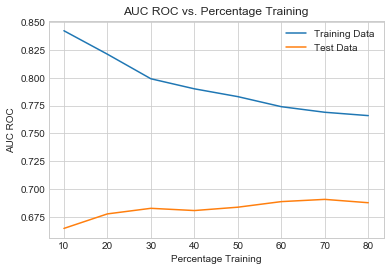

In [23]:
SVM_with_best_para = SVC(**SVM_test, kernel = 'rbf')
plot=[]
for i in range (10,90,10):
    train, test = train_test_split(data, train_size = i/100, random_state=1)
    countNoDefault, _ = train.default.value_counts()
    default = train.loc[train.default ==1]
    noDefault = train.loc[train.default == 0]
    defaultOver = default.sample(countNoDefault, replace = True)
    train = pd.concat([defaultOver, noDefault], axis = 0)
    x_train = train.loc[:, train.columns !='default']
    y_train = np.ravel(train.loc[:,train.columns =='default'])
    x_test = test.loc[:, test.columns !='default']
    y_test = np.ravel(test.loc[:,test.columns =='default'])
    scaled_train  = pd.DataFrame(scale.transform(x_train),columns = x_train.columns)
    scaled_test  = pd.DataFrame(scale.transform(x_test),columns = x_test.columns)
    roc_auc_train, roc_auc_test = perf(SVM_with_best_para)
    plot.append([i,roc_auc_train, roc_auc_test])
plot = pd.DataFrame(plot)

graph("AUC ROC vs. Percentage Training","Percentage Training","AUC ROC", plot);

In [25]:
plot.columns = ['Percentage Training', 'Training AUC ROC', 'Testing AUC ROC']
print(plot)

   Percentage Training  Training AUC ROC  Testing AUC ROC
0                   10             0.842            0.665
1                   20             0.821            0.678
2                   30             0.799            0.683
3                   40             0.790            0.681
4                   50             0.783            0.684
5                   60             0.774            0.689
6                   70             0.769            0.691
7                   80             0.766            0.688


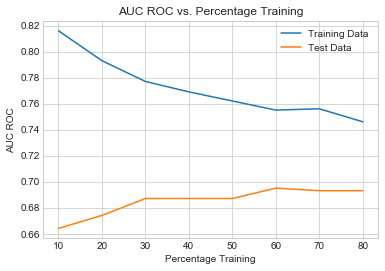

In [20]:
SVM_with_best_para = SVC(**SVM_test, kernel = 'poly')
plot=[]
for i in range (10,90,10):
    train, test = train_test_split(data, train_size = i/100, random_state=1)
    countNoDefault, _ = train.default.value_counts()
    default = train.loc[train.default ==1]
    noDefault = train.loc[train.default == 0]
    defaultOver = default.sample(countNoDefault, replace = True)
    train = pd.concat([defaultOver, noDefault], axis = 0)
    x_train = train.loc[:, train.columns !='default']
    y_train = np.ravel(train.loc[:,train.columns =='default'])
    x_test = test.loc[:, test.columns !='default']
    y_test = np.ravel(test.loc[:,test.columns =='default'])
    scaled_train  = pd.DataFrame(scale.transform(x_train),columns = x_train.columns)
    scaled_test  = pd.DataFrame(scale.transform(x_test),columns = x_test.columns)
    roc_auc_train, roc_auc_test = perf(SVM_with_best_para)
    plot.append([i,roc_auc_train, roc_auc_test])
plot = pd.DataFrame(plot)

graph("AUC ROC vs. Percentage Training","Percentage Training","AUC ROC", plot);

In [22]:
plot.columns = ['Percentage Training', 'Training AUC ROC', 'Testing AUC ROC']
print(plot)

   Percentage Training  Training AUC ROC  Testing AUC ROC
0                   10             0.816            0.664
1                   20             0.793            0.674
2                   30             0.777            0.687
3                   40             0.769            0.687
4                   50             0.762            0.687
5                   60             0.755            0.695
6                   70             0.756            0.693
7                   80             0.746            0.693
